# 6.4 다중공선성과 변수 선택
- 과최적화가 일어나는 경우 두 가지: 내가 쓰고 있는 모수의 수가 데이터에 비해 너무 많을 경우, 독립변수들 사이에 상관관계가 너무 강해서 x1과 x2가 거의 같은 데이터일 때
- 다중공선성(multicolinearity)이란 독립 변수의 일부가 다른 독립변수의 조합으로 표현될 수 있는 경우. 독립변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생
    - 이는 독립변수의 공분산 행렬이 풀랭크여야 한다는 조건을 침해한다. 역행렬이 잘 계산이 안 됨. 오차가 발생하는데 이게 과최적화의 원인이 되는 것    

#### 상관관계가 큰 변수들이 있으면 조건수가 커진다
- 조건수가 커지는 경우는
    - 스케일이 안맞는 경우
    - 다중공선성이 있는 경우

- r-squared 값과 교차 검증 값의 차이(트레인용 퍼포먼스와 테스트용 퍼포먼스)가 크게 나면 과최적화가 발생한 것
- 독립변수가 서로 의존하게 되면 이렇게 과최적화 문제가 발생해 회귀 결과의 안정성을 해칠 가능성이 높아진다
- 이를 방지하는 방법은 다음과 같다
    - 변수선택법으로 의존적인 변수 삭제
    - PCA(주성분분석, 차원축소) 방법으로 의존적인 성분 삭제
        - 변수 그냥 하나 없애면 아쉬우니 회전시켜서 잘 맞는 변수 남겨 놓고 잘 안맞는 변수 강제로 만들어서 없애는 방식   
    - 정규화(regularized) 방법 사용

### VIF기준으로 변수 선택
- Variance Inflation Factor.가장 의존적인 독립변수를 선택하는 방법
- VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타내는 것
- 다른 변수에 의존적일수록 VIF가 커진다
- StatsModels에서는 variance_inflation_factor 명령으로 VIF 계산

#### 데이터를 일부 선택해 과최적화, 데이터공선성을 방지하는 방법이 있다

# 6.5 정규화 선형회귀
- 정규화 선형회귀 방법은 선형회귀 계수(weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상 즉 과최적화를 막는 방법
- Regularized Method, Penalized Method, Contrained Least Squares

- 과최적화가 일어나면 w값이 커지는 현상이 발생
- 정규화 선형회귀는 w에 제약 조건을 추가해 커지지 않게 하는 것

- 정규화 선형회귀에도 3가지 방법이 있다. w값에 제약 조건을 주는 방식이 다르다
- Ridge, Lasso, Elastic Net 회귀모형
    - Ridge : 가중치들의 제곱합을 최소화하는 것을 추가 제약 조건으로
    - Lasso : 가중치의 절대값의 합을 최소화하는 것을 추가적 제약 조건으로
    - Elastic Net: 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형
- Statsmodels 패키지는 OLS 선형 회귀모형 클래스의 fit_regularized 메서드를 사용해 Elastic Net 모형 계수를 구할 수 있다

#### 정규화하게 되면 데이터가 어떻게되든 차수가 어떻게되든 나오는 결과가 항상 비슷하게 나온다. 안정적인 결과가 나온다는 것

### 사이킷런의 정규화 회귀모형

### 정규화 모형의 장점
- 회귀분석에 사용된 데이터가 달라져도 계수가 크게 달라지지 않도록 한다

### 정규화의 의미
- 정규화 제한 조건은 정규화가 없는 최적화 문제에 부등식 제한조건을 추가한 것과 마찬가지다

- Ridge 모형은 가중치 계수를 한꺼번에 축소(점차적으로 줄어든다)시키는 데 반해 Lasso 모형은 일부 가중치 계수가 먼저 0으로 수렴하는 특징이 있다
- 라쏘를 이용하게 되면 쓸모 없는 w부터 값을 0으로 만든다. 그러면 누가 더 쓸모 있고 쓸모 없는지를 알 수 있다. 이를 라쏘 패스(경로)라고 한다
- 라쏘 패스를 이용해 피처들의 중요성을 알 수 있는 방법도 있다

### 최적 정규화
- 정규화에서 한 가지 해결 안 된 사항: 람다라는 패널티 값을 얼마나 줘야 하나?
    - 예측 문제에서 모든 결정 문제는 태스크 퍼포먼스가 좋냐 안 좋냐를 보고 결정
    - 쟤도 일일이 다해보는 수밖에 없음. 그리드 서치 방법. 0.2 0.3 등등 주면서 태스크 퍼포먼스를 보는 수밖에 없음
- 제약 조건이 크면 클수록 학습성능은 떨어지게 돼 있다
- 검증성능은 어느정도까지 좋아지다 어느 수준 지나면 다시 나빠진다
    - 제약 조건 너무 없으면 과최적화
    - 제약 조건 너무 많이 주게 되면 풀 수 있는데도 못 풀게 만들다보니 성능 나빠짐
- 검증성능 곡선(validation curve)
    - 특정한 하나의 하이퍼 모수를 변화시켰을 때 학습 성능과 검증성능의 변화를 나타낸 곡선
    - 싸이킷런 패키지의 model_selection 서브패키지에서 제공하는 validation_curve 함수를 사용하면 검증성능 곡선을 더욱 쉽게 그릴 수 있다

### 다항회귀의 차수 결정
- 결국은 제약 조건을 결정하는 것과 마찬가지
- 다항회귀에서 차수가 감소하면 모형의 제약조건이 더 강화되므로 정규화 가중치가 커지는 것과 같다
- 반대로 차수가 증가하면 모형의 제약조건이 감소하므로 정규화 가중치가 작아지는 것과 같다
- 따라서 다항회귀에서 최적의 차수를 결정하는 문제는 최적 정규화에 해당한다

#### 회귀분석 프로젝트에서 마지막으로 해야 하는 일은 패널티 웨이트 값이라든가 차수라는 것을 갖다가 미세 조정을 해서 하이퍼 파라미터 튜닝이라는 것을 해줘야 한다.

# 데이터 과학을 위한 머신러닝

## 1부 전처리

### 1. 텍스트 데이터 전처리
#### 1) NLTK 자연어 처리 패키지

- NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다
    - 주요 기능은 다음과 같다
    - 말뭉치, 토큰 생성, 형태소 분석, 품사 태깅

- 필요패키지 : NLTK, KoNLpy, Gensim, Scikit-Learn

In [6]:
!pip install NLTK

- 말뭉치(Corpus): 텍스트 분석에 필요한 텍스트 데이터, 샘플 문서 집합
    - 웹 크롤링 등으로 수집
    - 텍스트 처리 패키지에서 제공하는 샘플 말뭉치 사용
- 우리나라 코퍼스 잘 돼 있지 않다. 세종 말뭉치 있지만 다 저작권 해결된 것은 아냐
    - 세종 코퍼스 자체는 국립국어원 사이트 가면 받을 수 있다

In [8]:
import nltk
nltk.download("book")
nltk.download("movie_reviews")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/Im/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /Users/Im/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /Users/Im/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /Users/Im/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/Im/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/Im/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /Users/Im/nltk_data...
[nltk_data]    |   Package

True

#### step 2: 구텐베르그 말뭉치 목록
- 구텐베르그 운동: 저작권 말소된 책을 가지고 말뭉치를 만들어 공유하자
- 그 중 극히 일부의 책을 여기에 담아 놓은 것

In [13]:
# 구텐베르그 책 목록
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [15]:
# 풀 텍스트
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:702])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


### 토큰화

- 토큰화(Tokenizing)
    - 말뭉치(텍스트 데이터)를 "토큰"이라고 불리는 작은 단위로 나누는 행위
    - 토큰(Token) : 문장, 단어, 형태소 등 분석에 있어서 의미를 가지는 단위
            - 토큰이 뭐다하는 것은 필요에 따라서 달라진다
            - 대부분의 경우 영어는 의미가 같은 정규화된 단어를 토큰으로 한다
            - 한국어는 의미가 같은 정규화된 형태소를 토큰으로 한다
    - 토큰의 명칭
        - 토큰의 이름은 실제 토큰의 활용과 관계가 없다
        - 숫자 혹은 기호로 나타내거나
        - 품사 등을 덧붙여서 쓰는 경우도 있음

- 형태소
    - 형태소(morpheme) : 의미를 가진 가장 작은 말의 단위
    - 한국어 형태소
        - 자립 형태소: 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등
        - 의존 형태소: 접사, 어미, 조사, 어간 등

- 정규화
    - 정규화(Normalization)
        - 의미와 쓰임이 같은 단어를 같은 토큰으로 표시
        - fly/v(날다), fly/n(파리) 등으로 나눠서 써줄 수 있다
    - 대소문자 통합(case removal)
        - 
    - 어간 추출(stemming)
    - 표제어 추출(lemmatization)
    - 품사 부착(Part-Of-Speech tagging)
    - 불용어(stopwords)

- 어간 추출
    - 어간 추출: 단어를 어간과 접사로 분리해 단순히 접사를 삭제하거나 교체
        - 어간(stem): 단어의 의미를 담고 있는 핵심 부분
        - 접사(affix): 단어에 부가적인 의미를 주는 부분
        - fly, flies, flew => fl
    - 단순 알고리즘 사용
        - 포터(Porter) 알고리즘
        - 랭케스터(Lancaster) 알고리즘

- 표제어 추출(알고리즘 복잡함)
    - 기본 사전형 단어로 변형
    - am, is, are, was, were, been => be
    - has, had => have
    - 사전 정부(WordNet) 사용

- 품사 부착
    - 품사(POS: Part-Of-Speech)
        - 단어의 쓰임에 다른 구분
        - 동일한 철자의 단어가 다른 의미나 다른 품사로 쓰이는 경우
            - 다른 토큰으로 토큰화해야 한다
        - 예:
            - permit: 허락하다(동사), 허가증(명사)
            - refuse: 거부하다(동사), 쓰레기/배출(명사)

- 불용어(Stop-Words)
    - 분석의 필요성이 없는 단어
    - 모든 문서에서 너무 자주 쓰이는 단어
    - 너무 드물게 나타나는 단어
    - 예: 관사,(a, an, the), 조사(은,는,이,가,다)

### 실습2: 토큰화와 정규화

#### step1: 토큰화
- NLTK의 word_tokenize 함수 사용

In [16]:
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [17]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

#### step2: 어간 추출
- NLTK의 ProterStemmer, LancasterStemmer 사용

In [20]:
from nltk.stem import PorterStemmer, LancasterStemmer
st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer : ", [st1.stem(w) for w in words])
print("Lancaster Stemmer : ", [st2.stem(w) for w in words])

Porter Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


In [21]:
# 결과에서 flew, flown 은 안 바뀐다. 못 잡아낸 것. 이것은 포터와 랭케스터 알고리즘의 한계.
# 둘 다 복잡한 알고리즘이 아냐

### step3: 표제어 추출
- 진짜로 표제어를 찾고 싶다면 사전을 찾아야 해
- NLTK의 WordNetLemmatizer 사용 (WordNet 이라는 사전 사용)

In [24]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos = "v") for w in words] # fly를 동사로 정해주는 파라미터 pos="v"
# 레머타이징 한것과 스테밍한 것 용량이 크면 시간 차가 엄청나게 난다

['fly', 'fly', 'fly', 'fly', 'fly']

- NLTK의 pos_tag 사용

In [27]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_listb

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

#### 품사 부착(태그)
- 문맥을 보고선 품사를 찾아주는 것
- NNP : 고유대명사
- VBD : 동사의 과거형
- VB : 동사
- NN : 명사

In [29]:
# 단어와 품사 태그를 하나의 토큰으로 만들어주는 함수 토크나이저
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]
tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [30]:
from nltk.corpus import stopwords
stopwords.words("english")[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

### NLTK의 빈도 분석
- 어떤 토큰이나 단어 있을 때 언제 쓰였고 몇번 쓰였는지 등을 분석 
- 두 가지 클래스 사용
    - Text 클래스
    - FreqDist 클래스(Frequency Distribution)

#### Text 클래스
- NLTK의 Test 클래스는 문서 분석에 유용한 여러가지 메서드를 제공한다
    - plot: 단어 빈도 그래프
    - dispersion_plot: 단어 위치 그래프
    - concordance: 단어 문맥 인쇄
    - similar: 유사 단어 검색

### 3. Text 클래스 실습
    - step1: 클래스 객체 생성

In [36]:
from nltk import Text
text = Text(word_tokenize(emma_raw))

- step2: 단어 빈도 그래프

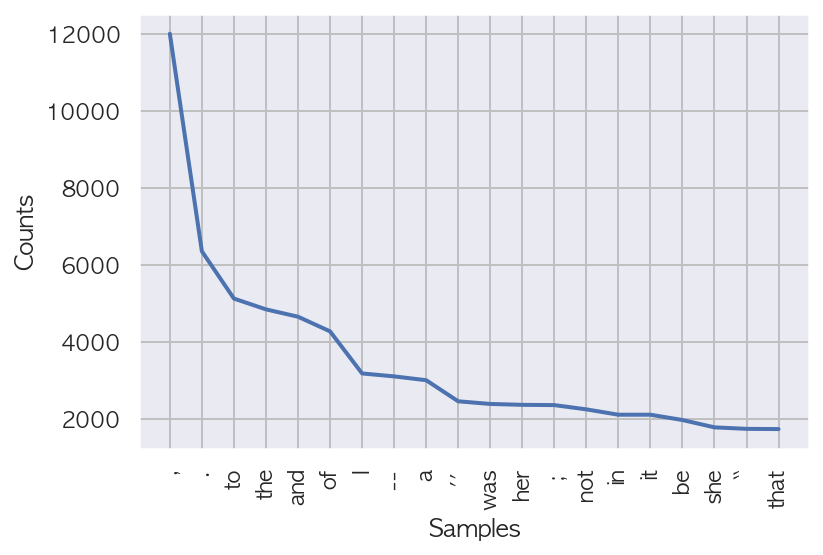

In [39]:
text.plot(20) # 가장 많이 사용되는 20개 단어
plt.show()

- step3: 단어 위치 그래프
    - dispersion_plot 메서드는 단어가 사용된 위치를 시각화한다. 소설 엠마의 각 등장인물들에 대해 적용하면 다음과 같은 결과

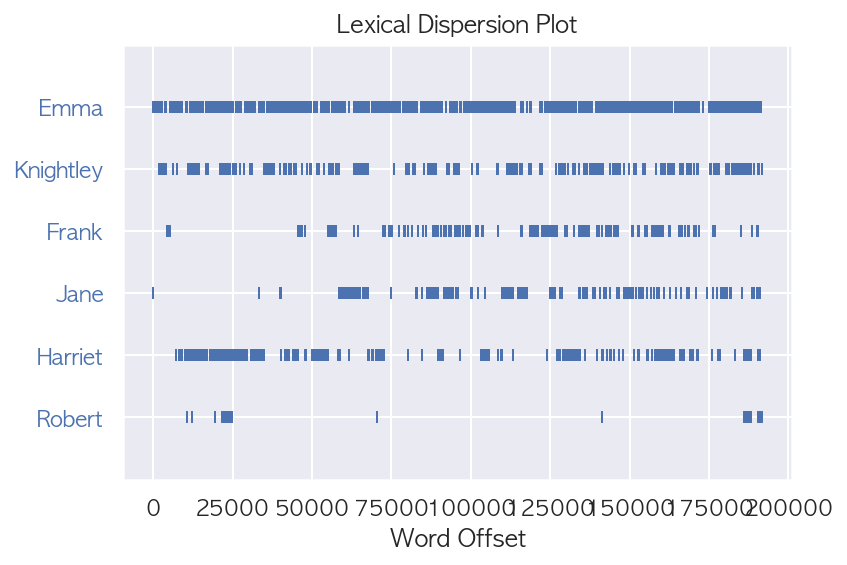

In [40]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [41]:
# 이 소설 전체가 20만 단어로 이뤄져 있다, Punctuation mark(쉼표 마침표) 다 포함한 것

- step4 : 단어 문맥 인쇄
    - concordance 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다.
    - 여기서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다

In [44]:
text.concordance("Emma")

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

##### 경우에 따라서는 윈도우라는 말도 쓰는데 문맥의 크기를 말할 때
- 윈도우1: 앞에 한 단어 뒤에 한 단어 
- 윈도우2: 앞 두 단어, 뒤 두 단어를 문맥이라고 말한다
- nltk에서는 보통 윈도우 1을 기준으로 한다
- Word2bec에서는 보통 5~6개까지 간다

- step5 : 유사 단어 검색
    - similar 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다

In [56]:
text.similar("Emma", 1) # nltk에서는 윈도우 1 기준으로, 숫자 1은 첫번째로 많이 쓰인 것

she


- step6 : 공통 문맥 인쇄
    - 두 단어의 공통 문맥을 보려면 common_contexts 메서드를 사용

In [59]:
text.common_contexts(["Emma", "she"], 2)

but_was and_could


In [58]:
# but Emma was, but she was라는 말이 많이 쓰였다는 것

### FreqDist 클래스

- FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스
- Text 클래스의 vocab 메서드로 추출할 수 있다
- 토큰 리스트를 넣어서 직접 만들 수도 있다
- 빈도 분석에 유용한 여러가지 메서드 제공
    - N : 빈도(횟수)
    - freq : 빈도(퍼센트)
    - most_common : 가장 많이 나오는 단어
    - plot : 가장 많이 나오는 단어 플롯

- step1: Text 클래스에서 생성

In [60]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

- step2: 토큰 리스트에서 생성
    - 다음 코드에서는 Emma 말뭉치에서 사람의 이름(NNP)만 모아서 FreqDist 클래스 객체를 만들었다
    - 품사 태그에서 NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거했다

In [69]:
emma_tokens

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty-one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.')

In [75]:
from nltk import FreqDist
stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
# 리스트 컴프리핸션 : 엠마 토큰스의 데이터를 t로 받아서 뒤의 조건에 적합하면 t[0]의 이름을 리스트로 저장
fd_names = FreqDist(names_list)
fd_names
# t[0]는 고유명사. t[1]은 태그 열을 각각 가리킨다

FreqDist({'Emma': 829, 'Harriet': 477, 'Weston': 429, 'Elton': 374, 'Knightley': 373, 'Woodhouse': 307, 'Jane': 295, 'Fairfax': 232, 'Churchill': 213, 'Frank': 207, ...})

- step3: 단어 빈도 분석
    - FreqDist 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사하다.
    - 다음 코드는 전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률을 각각 계산한다

In [78]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(6924, 829, 0.11972848064702483)

In [79]:
# 이름이 약 7000개 그 중 800개 정도가 엠마, 비율은 12퍼센트 정도가 된다는 뜻

In [80]:
# most_common 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다
fd_names.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

In [81]:
# 감성분석?을 할 때는 형용사를 뽑아서 활용할 수 있다. 상품평 등...

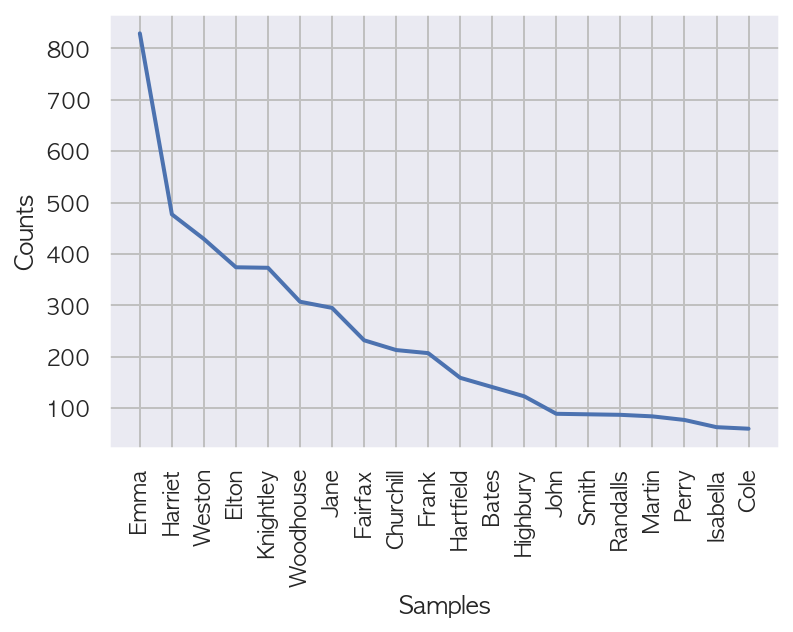

In [82]:
fd_names.plot(20)
plt.show()

### 워드 클라우드
- wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드 시각화를 할 수 있다

In [84]:
# 워드클라우드 패키지 설치
!pip install wordcloud
# 또는 conda install wordcloud -c conda-forge

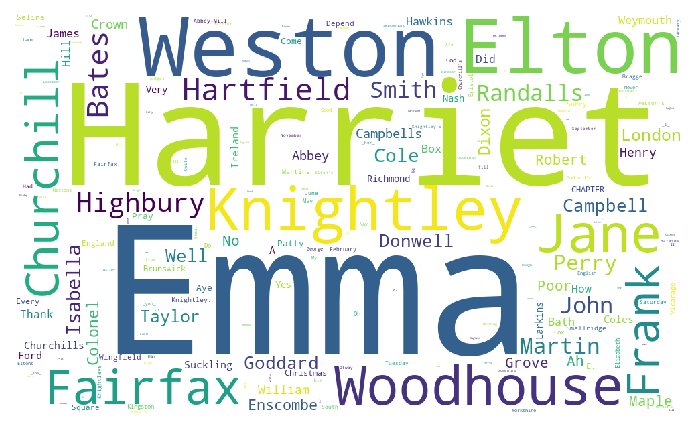

In [88]:
from wordcloud import WordCloud

wc = WordCloud(width = 1000, height = 600, background_color = "white", random_state = 0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

#### 연습문제: 소설 등장인물 이름 워드클라우드 제작
- 구텐베르그 프로젝트의 소설 말뭉치 중 하나를 골라서 등장인물 이름의 빈도 플롯과 워드클라우드를 제작하라

## 한글 자연어 처리
- KoNLPy 패키지 사용

In [90]:
# KoNLPy 패키지 설치
!pip install konlpy

     |████████████████████████████████| 19.4 MB 464 kB/s eta 0:00:01    |█████████▊                      | 5.9 MB 733 kB/s eta 0:00:19     |████████████████████████████▉   | 17.5 MB 561 kB/s eta 0:00:04
     |████████████████████████████████| 86 kB 837 kB/s eta 0:00:011
     |████████████████████████████████| 299 kB 932 kB/s eta 0:00:01
     |████████████████████████████████| 147 kB 663 kB/s eta 0:00:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.8.2
    Uninstalling beautifulsoup4-4.8.2:
      Successfully uninstalled beautifulsoup4-4.8.2


### KoNLPy 기능
- 샘플 말뭉치(corpus)
    - kolaw: 헌법 말뭉치
    - kobill: 법안 말뭉치
- 한글 형태소 분석기
    - koNLPy는 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓음
    - c나 자바 등에서 만든 형태소 분석기를 파이선에서 사용할 수 있도록 모아놓은 것이라 제대로 작동 안 할 수도 있다

#### 형태소 분석 기능
- Hannanum: 한나눔, KAIST Semantic Web Research Center 개발
- Kkma: 꼬꼬마, 서울대 IDS(intelligent Data Systems) 연구실 개발
- Komoran: 코모란, Shineware에서 개발
- Mecab: 메카브, 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
- Open Korean Text: 오픈 소스 한국어 분석기, 과거 트위터 형태소 분석기

### 형태소 분석기 기능
- 각 형태소 분석기는 다음과 같은 공통 메서드를 제공
    - nouns: 명사 추출
    - morphs: 형태소 추출
    - pos: 품사 부착

### 실습5: KoNLPy 사용
- step1: 헌법 말뭉치

In [92]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [93]:
c = kolaw.open("constitution.txt").read()
print(c[:450])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       


- step2: 법안 말뭉치

In [94]:
from konlpy.corpus import kobill
kobill.fileids()

['1809896.txt',
 '1809897.txt',
 '1809895.txt',
 '1809894.txt',
 '1809890.txt',
 '1809891.txt',
 '1809893.txt',
 '1809892.txt',
 '1809899.txt',
 '1809898.txt']

In [97]:
d = kobill.open("1809890.txt").read()
print(d[:400])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).



- step3: 형태소 분석기 생성

In [101]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

# 다음 형태소 분석기는 자바 등의 연결에 따라 안 될 수도 있다
komoran = Komoran()
#mecab = Mecab()

In [103]:
# 명사 추출
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [104]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [106]:
# 분석기마다 결과가 다르게 나온다
# 대한민국을 하나로 뽑지 않고, 대한, 민국 등으로 따로 뽑는 것을 앤그램이라고 한다

In [107]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

- step5: 형태소 추출
    - 명사 뿐 아니라 모든 품사의 형태소를 알아내려면 morphs 메서드 사용

In [108]:
hannanum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [109]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [110]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

#### 성능과 속도 서로 트레이드 오프가 있는데 속도면에서는 okt, 성능은 한나눔, 꼬꼬마가 낫다

- step6: 품사 부착
    - pos 명령을 사용하면 품사 부착한다
    - 한국어 품사 태그 세트로는 형태소 분석기마다 사용하는 품사 태그가 다르므로 각 형태소 분석기에 대한 문서를 참조한다
    - 부착되는 품사 태그의 기호와 의미는 tagset 속성으로 확인할 수 있다

In [111]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [112]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [113]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [122]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

- step7: 빈도 분석
    - NLTK 기능 사용해 한글 빈도 분석 가능

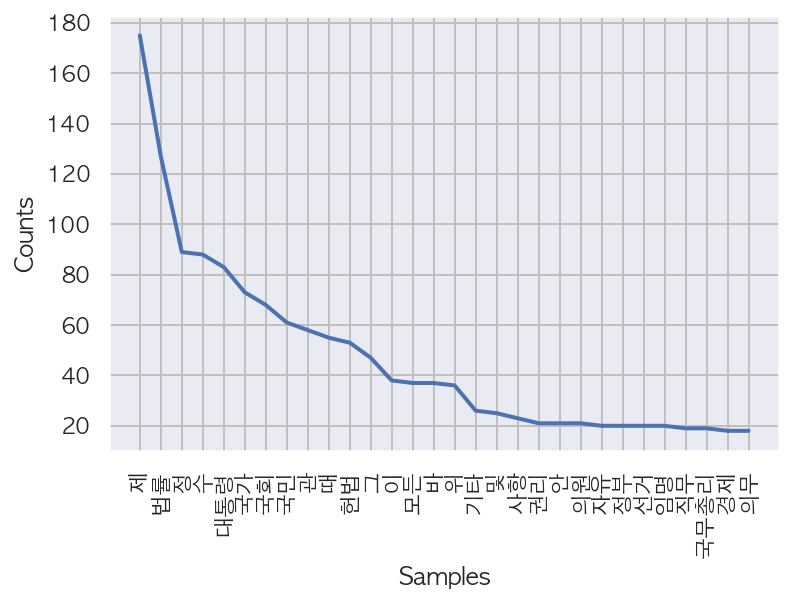

In [123]:
from nltk import Text
kolaw = Text(okt.nouns(c))
kolaw.plot(30)
plt.show()

- step8: 한글 워드클라우드

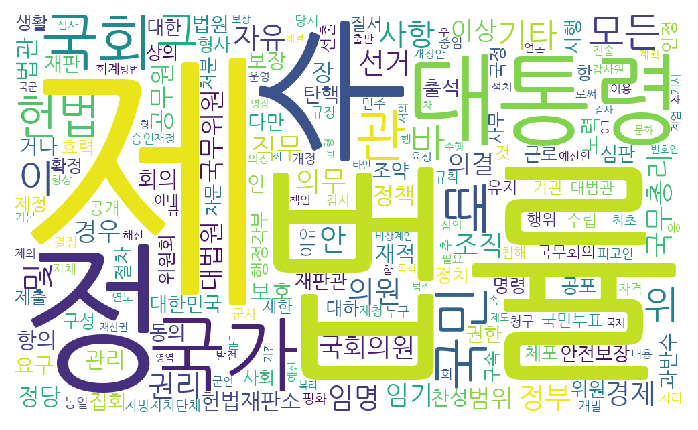

In [128]:
from wordcloud import WordCloud
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
wc = WordCloud(width = 1000, height = 600, background_color = "white", font_path = font_path, random_state = 0)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

### komoran 사용자 사전 추가
- koNLPy 가지고 형태소 분석하다보면 제대로 안 되는 경우 생긴다.
- 특히 고유명사가 들어가면. 사람 이름, 노래 제목, 신조어
- 이럴 때 사용자 사전을 추가해 형태소 분석을 할 수 있다
    - 그런데 형태소 분석기마다 방법이 다르다
- 강의자료 참고해서 해볼 것

# 사이킷런의 문서 전처리 기능
### BOW(Bag of Words)
- 문서를 숫자 벡터로 변한하는 가장 기본적인 방법.
- 전체 문서(말뭉치) {d1, d2, d3,...,dn}를 구성하는 고정된 단어장(vocabulary) {t1, t2,...,tm}을 만들고 di 라는 개별 문서에 단어장에 해당하는 단어들이 포함돼 있는지 표시하는 방법
- 사이킷런에의 feautre_extraction 서브패키지와 feature_extraction.text 서브 패키지는 다음과 같은 문서 전처리용 클래스를 제공
    - DictVectorizer: 각 단어의 수를 세어놓은 사전에서 BOW 벡터를 만든다
    - CountVectorizer: 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만든다. 몇번 나왔냐(빈도수)로 인코딩
    - TfidfVectorizer: CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 벡터를 만든다. 빈도수에서 중요도에 따라 그 숫자를 늘리고 줄이는 역할.
    - HashingVectorizer: 해시 함수(hash function)을 사용해 적은 메모리와 빠른 속도로 BOW 벡터를 만든다. 실무에서 우리가 쓰는 vocabulary dictionary가 너무 클 때 메모리, 속도 문제 등으로 빠르게 처리할 수 없거나 아예 처리할 수 없을 때 쓴다.  

#### DictVectorizer

- 각 단어가 몇번 나왔는지 우리가 수동으로 다 세서 넣어줘야 한다
- 처음에 피팅했을 때 코퍼스에서 없었던 단어는 나중에 아예 없는 단어로 처리
- 그래서 처음에 웬만하면 단어가 다 들어가 있는 것으로 코퍼스를 만들어야 한다
- 사실상 쓰이지 않는 벡터라이저

#### CountVectorizer
- 1. 문서를 토큰 리스트로 변환한다
- 2. 각 문서에서 토큰의 출현 빈도를 센다
- 3. 각 문서를 BOW 인코딩 벡터로 변환한다

- 문서만 넣어주면 끝
- 가장 많이 쓰이는 벡터라이저

- 각 단어마다 번호가 매겨져 있다.
- 아예 없던 단어가 나오면 무시된다
    - 다 포함하고 있는 코퍼스를 써야 이런 현상 안 생김

### Vectorize 클래스 사용법
- 1. 클래스객체 생성
- 2. 말뭉치를 넣고 fit 메서드 실행
- 3. vocabulary_ 속성에 단어장이 자동 생성됨
- 4. transform 메서드로 다른 문서를 BOW 인코딩
- 5. BOW인코딩 결과는 Sparse 행렬로 만들어지므로 toarray 메서드로 보통 행렬로 변환
    - 스파스 메이트릭스는 0이 아닌 부분에 대해서만 메모리에 저장하는 행렬. 보통 행렬에는 0이 많아 저장공간 아까워서

### Stop words
- 문서에서 단어장을 생성할 떄 무시할 수 있는 단어

### 토큰
- analyzer, tokenizer, token_pattern 등의 인수로 사용할 토큰 생성기를 선택할 수 있다
    - analyzer는 캐릭터 단위로 토크나이저 할 수 있는 기능 추가
    - token_pattern은 정규표현식 이용해 토큰 찾는 기능이 있음
    - 외부에 있는 패키지에 있는 함수를 토크나이저 인수로 집어 넣을 수도 있음

### n-그램
- 단어장 생성에 사용할 토큰의 크기를 결정.
- 모노그램(1-그램)은 토큰 하나만 단어로 사용하며 바이그램(2-그램)은 두 개의 연결된 토큰을 하나의 단어로 사용한다. 3개의 단어로 하나의 토큰을 만들면 트라이그램(3-gram)
- 예) 참 좋아, 참 나빠 등 단어 하나만 가지고는 그 뜻을 알 수 없는 경우
- 단어가 아니라 구를 갖다가 토큰으로 사용하겠다는 것과 같음
- CountVectorizer(ngram_range=(1, 2)) # 모노그램과 바이그램 모두 토큰으로 사용하겠다. 그 만큼 개수 많아짐

### 빈도수
- 불용어는 이 문서 저 문서에 다 있어서 단어로서 그 문서를 구분하는 능력이 떨어지는 단어들
- 미리 불용어로 정해진 단어들을 쓸수도 있지만 내가 직접 문서를 살펴 빈도수를 알아보고 불용어를 정할 수도 있다.
- max_df, min_df 인수를 사용해 문서에서 토큰이 나타낫 횟수를 기준으로 단어장을 구성할 수도 있다
- 토큰의 빈도가 max_df로 지정한 값을 초과하거나 min_df로 지정한 값보다 작은 경우에는 무시한다.
- 인수 값은 정수인 경우 횟수 부동소수점인 경우 비중을 뜻한다.

### 실습 7 : 사이킷런의 CountVectorizer 사용
- step1 : 말뭉치 만들기
- step2 : 인코더 객체 생성
- step3 : 말뭉치 학습 및 단어장 생성
    - 개수가 많으면 이렇게 단어마다 번호 마라 매겨서 딕셔너리를 만드는 방법 잘 사용 안 하게 된다
    - 그래서 해시벡터라이저를 쓰게 됨
- step4 : 문장을 BOW 인코딩
    - 말뭉치에서 학습하지 못한 단어는 무시된다
- step5 : 불용어 사용
    - stop_words=로 단어 직접 적어넣거나 "english"
- step6: 빈도수 적용
    - max_df, min_df
- step7: N-그램 적용

### TF-IDF 인코딩
- TF-IDF(Term Frequency - Inverse Document Frequency) 인코딩
- 우리가 지금까지 써왔던 방법이 TF
- 이와 달리 단어를 개수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법
    - Term Frequency : 특정한 단어의 빈도수
    - Inverse Document Frequency: 특정한 단어가 들어가 있는 문서의 수에 반비례하는 수
        - idf(d, t) = log(n / (1 + df(t))

### 해시 트릭(Hash Trick)
- CountVectorizer는 모든 작업을 메모리 상에서 수행
- 처리할 문서의 크기가 커지면 단어장(vocabulary_) 딕셔너리가 커진다.
- 실행 속도가 느려지거나 실행이 불가능해진다. 사실상 단어장의 개수가 만개가 넘거나하면 못 씀
- HashingVectorizer를 사용하면 해시 함수(Hash function)를 사용
    - 해시함수에 문자가 들어가면 무슨 숫자가 나올지 예측하기 어려움. 보통 암호화에도 많이 쓰인다
    - 이 연산 속도가 빠름
- 단어에 대한 인덱스 번호를 수식으로 생성
- 사전 메모리가 없고 실행 시간을 줄일 수 있다
- 단어의 충돌이 있을 수 있다. 보이를 넣었는데 3, 걸을 넣었는데 3이 나올 수도 있다. 가끔
    - 발생하는 일이 적어지도록 파라미터 조정할 수 있음

In [136]:
#### 현실에서는 해시 벡터라이저를 쓰는 게 일반적

### Gensim 패키지
- Bag Of Words인코딩
- Tf-IDF 인코딩
- 토픽 모델링

In [139]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 33 kB/s eta 0:00:015    |██████▏                         | 4.6 MB 121 kB/s eta 0:02:42     |██████████████████▉             | 14.2 MB 128 kB/s eta 0:01:18
     |████████████████████████████████| 103 kB 39 kB/s eta 0:00:01
     |████████████████████████████████| 128 kB 27 kB/s eta 0:00:01
     |████████████████████████████████| 69 kB 32 kB/s eta 0:00:01
     |████████████████████████████████| 6.2 MB 79 kB/s eta 0:00:01
     |████████████████████████████████| 547 kB 72 kB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101341 sha256=b288f7e3381552cd63f6247d9eaf90b0e1d0137d132909e6e030c847140ee809
  Stored in directory: /Users/Im/Library/Caches/pip/wheels/bb/1c/9c/412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.1

### Gensim의 BOW 인코딩 기능
- Dictionary 클래스 이용
    - token2id 속성으로 사전 저장
    - doc2bow 메서드로 BOW 인코딩
- TfidModel 클래스를 이용하면 TF-IDF 인코딩도 가능

### 실습8: Gensim의 BOW 인코딩
- step1: 말뭉치 만들기

In [144]:
corpus = [
    "This is the first document.",
    "This is the second document.",
    "And the third one.",
    "Is this the first document?",
    "The last document?",
]

- step2: 토큰 리스트 생성

In [145]:
token_list = [[text for text in doc.split()] for doc in corpus] # 워드토크나이저 대신 split을 써볼 수도 있다
token_list

[['This', 'is', 'the', 'first', 'document.'],
 ['This', 'is', 'the', 'second', 'document.'],
 ['And', 'the', 'third', 'one.'],
 ['Is', 'this', 'the', 'first', 'document?'],
 ['The', 'last', 'document?']]

- step3: Dictionary 객체 생성

In [146]:
from gensim.corpora import Dictionary

dictionary = Dictionary(token_list)
dictionary.token2id

{'This': 0,
 'document.': 1,
 'first': 2,
 'is': 3,
 'the': 4,
 'second': 5,
 'And': 6,
 'one.': 7,
 'third': 8,
 'Is': 9,
 'document?': 10,
 'this': 11,
 'The': 12,
 'last': 13}

- step4: BOW 인코딩

In [147]:
term_matrix = [dictionary.doc2bow(token) for token in token_list]
term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (1, 1), (3, 1), (4, 1), (5, 1)],
 [(4, 1), (6, 1), (7, 1), (8, 1)],
 [(2, 1), (4, 1), (9, 1), (10, 1), (11, 1)],
 [(10, 1), (12, 1), (13, 1)]]

In [148]:
# 위와 같은 행렬을 Sparse matrix라고 말함
# 스파스 메이트릭스는 0이 아닌 부분에 대해서만 메모리에 저장하는 행렬. 보통 행렬에는 0이 많아 저장공간 아까워서

- step5: TF_IDF 인코딩

In [150]:
from gensim.models import TfidfModel
tfidf = TfidfModel(term_matrix)

for doc in tfidf[term_matrix]:
    print("doc:")
    for k, v in doc:
        print(k, v)

doc:
0 0.49633406058198626
1 0.49633406058198626
2 0.49633406058198626
3 0.49633406058198626
4 0.12087183801361165
doc:
0 0.4034194772828018
1 0.4034194772828018
3 0.4034194772828018
4 0.09824442362969368
5 0.7085945309359098
doc:
4 0.07979258234193365
6 0.5755093812740171
7 0.5755093812740171
8 0.5755093812740171
doc:
2 0.3485847413542797
4 0.08489056411237639
9 0.6122789185961829
10 0.3485847413542797
11 0.6122789185961829
doc:
10 0.37344696513776354
12 0.6559486886294514
13 0.6559486886294514


- 머신러닝 뒷부분 토픽 모델링에서 겐심을 이용해 TF_IDF한 BOW 인코딩하는 과정이 필요함

## 토픽 모델링
    - 토픽은 어떤 단어들이 나왔을 때 단어가 나오는 비중(Frequency Distribution)
        - 문서를 구성하는 단어의 비율
        - 문서 집합의 추상적인 주제
        - 어떤 같은 주제에 대해 단어들이 몰려 있는 것

- step1: 텍스트 데이터 다운로드

In [163]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(
    categories = ["comp.graphics", "rec.sport.baseball", "sci.med"])

- step2: 명사 추출

In [158]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

tagged_list = [pos_tag(word_tokenize(doc)) for doc in newsgroups.data]
nouns_list = [[t[0] for t in doc if t[1].startswith("N")] for doc in tagged_list]

- step3: 표제어 추출

In [156]:
# 단어 중 복수로 돼 있는 애들을 단수로 만드는 표제어 추출, 표준화
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
nouns_list = [[lm.lemmatize(w, pos = "n") for w in doc] for doc in nouns_list]

- step4: 불용어 제거

In [159]:
import re
token_list = [[text.lower() for text in doc] for doc in nouns_list]
token_list = [[re.sub(r"[^A-Za-z] + ", '', word) for word in doc] for doc in token_list]

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stop_words += ["", "subject", "article", "line", "year", "month", "address", "keyword", "msg"]

token_list = [[word for word in doc if (word not in stop_words) and (2 < len(word) < 10)] for doc in token_list]

- step5 : 토픽 모델링

In [164]:
from gensim import corpora

dictionary = corpora.Dictionary(token_list)
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in token_list]

In [169]:
from gensim.models.ldamodel import LdaModel

model = LdaModel(corpus = doc_term_matrix, id2word = dictionary, num_topics = 3, passes = 10)

In [170]:
model.print_topics()

[(0,
  '0.013*"lines" + 0.006*"image" + 0.006*"graphics" + 0.005*"computer" + 0.005*"data" + 0.004*"program" + 0.004*"software" + 0.004*"thanks" + 0.003*"time" + 0.003*"anyone"'),
 (1,
  '0.015*"lines" + 0.005*"jpeg" + 0.005*"image" + 0.005*"team" + 0.004*"anyone" + 0.004*"game" + 0.003*"time" + 0.003*"baseball" + 0.003*"runs" + 0.003*"thanks"'),
 (2,
  '0.009*"lines" + 0.005*"people" + 0.005*"time" + 0.005*"years" + 0.004*"food" + 0.004*"science" + 0.003*"david" + 0.003*"players" + 0.003*"dyer" + 0.003*"way"')]

- step6: 토픽 시각화

In [174]:
!pip install pyLDAvis

Processing /Users/Im/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414/pyLDAvis-2.1.2-py2.py3-none-any.whl
Processing /Users/Im/Library/Caches/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb/funcy-1.14-py2.py3-none-any.whl


In [175]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.094695 -0.062036       1        1  35.193451
0     -0.112230 -0.036887       2        1  34.781330
1      0.017535  0.098923       3        1  30.025223, topic_info=          Term        Freq       Total Category  logprob  loglift
1578      jpeg  211.000000  211.000000  Default  30.0000  30.0000
856      image  462.000000  462.000000  Default  29.0000  29.0000
403       team  289.000000  289.000000  Default  28.0000  28.0000
2829      dyer  134.000000  134.000000  Default  27.0000  27.0000
114   graphics  389.000000  389.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
260     people   95.083733  423.491180   Topic3  -5.9665  -0.2906
7     computer   89.959816  345.510620   Topic3  -6.0219  -0.1425
703   software   84.649467  276.275055   Topic3  -6.0827   0.0203
238        way   84.727219  309.309998   Topic3  -6.0818  -0.0918
86       world   82.554802  275.291077   Topic3  -6.1078  -0.0012

[273 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
909       1  0.959593     acid
909       2  0.026655     acid
4858      2  0.953548      acm
185       1  0.707689      age
185       2  0.162420      age
...     ...       ...      ...
565       3  0.803368  yankees
37        1  0.610402    years
37        2  0.176614    years
37        3  0.213796    years
7170      1  0.967158    yount

[466 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])